In [1]:
# import packages
import pybeam.precoded as pbp
import numpy as np


In [2]:
# define model
model = pbp.changing_thresholds(thresholds = 'exponential')

# model parameters
model.parameters()


['tnd', 'w', 'mu', 'b', 'tau']

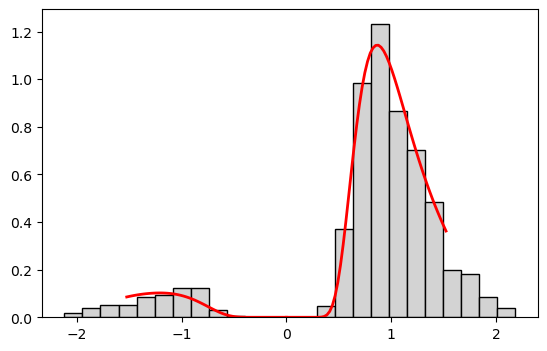

In [14]:
phi = {'tnd' : 0.1,          # non-decision time
         'w' : 0.5,           # relative start point
        'mu' : 1.0,           # drift rate
         'b' : 3.0,           # threshold
       'tau' : np.log10(1.0)} # decay parameter

rt = pbp.simulate(N_sims = 1000, model = model, phi = phi)
fig = pbp.plot_rt(model = model, phi = phi, rt_max = 1.5, rt = rt);


In [16]:
p = {'p_tnd' : 'Uniform("tnd", lower = 0.0, upper = 1.0)',
       'p_w' : 'Uniform("w", lower = 0.25, upper = 0.75)',
      'p_mu' : 'Uniform("mu", lower = -5.0, upper = 5.0)', 
       'p_b' : 3.0,
     'p_tau' : 'Uniform("tau", lower = -1.0, upper = 2.0)'}

c0 = {'rt' : rt, 
     'tnd' : 'p_tnd',
       'w' : 'p_w',
      'mu' : 'p_mu',
       'b' : 'p_b',
     'tau' : 'p_tau'}

c = {0 : c0}

idata = pbp.inference(model = model,   
                     priors = p,       
                 conditions = c,       
                    samples = 25000,   
                     chains = 3,       
                      cores = 3,          
                  file_name = 'exponential_thresholds')


Multiprocess sampling (3 chains in 3 jobs)
DEMetropolisZ: [tau, mu, w, tnd]


/Users/matthewmurrow/opt/miniconda3/envs/pymc_env/lib/python3.10/site-packages/pymc/step_methods/metropolis.py:1024: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/Users/matthewmurrow/opt/miniconda3/envs/pymc_env/lib/python3.10/site-packages/pymc/step_methods/metropolis.py:1024: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/Users/matthewmurrow/opt/miniconda3/envs/pymc_env/lib/python3.10/site-packages/pymc/step_methods/metropolis.py:1024: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
Sampling 3 chains for 0 tune and 25_000 draw iterations (0 + 75_000 draws total) took 29 seconds.


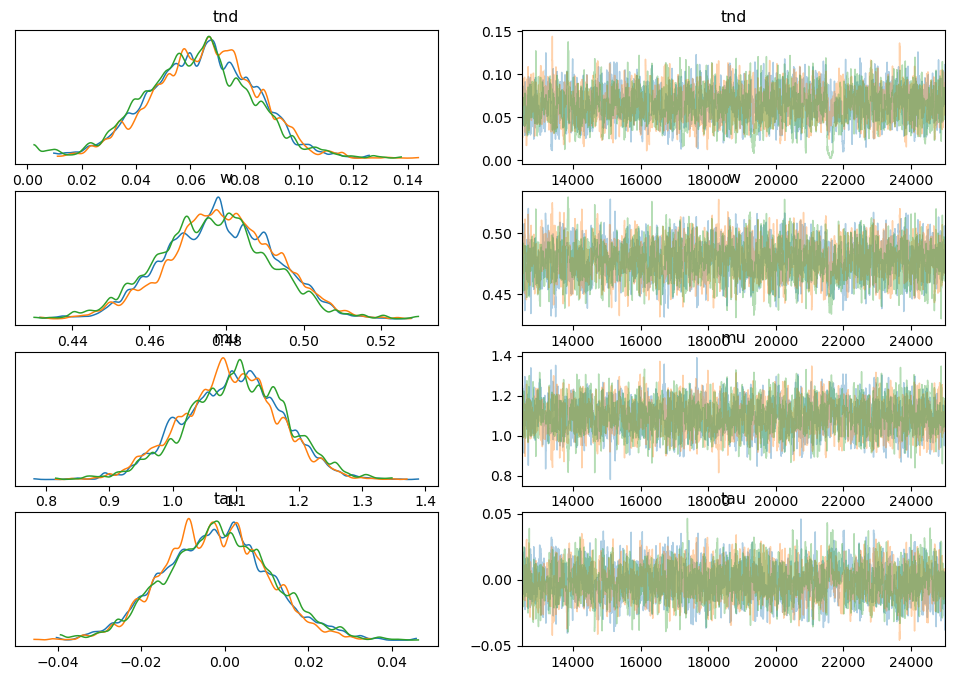

In [17]:
pbp.plot_idata(file_name = 'exponential_thresholds', burnin = 12500);


In [6]:
pbp.summary(file_name = 'exponential_thresholds', burnin = 12500)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
tnd,0.259,0.011,0.239,0.279,0.000,0.000,1358.0,1604.0,1.0
w,0.486,0.013,0.462,0.509,0.000,0.000,1617.0,2448.0,1.0
mu,1.091,0.066,0.965,1.213,0.002,0.001,1414.0,2099.0,1.0
b,0.953,0.047,0.869,1.048,0.001,0.001,1178.0,1449.0,1.0
lamb,0.237,0.055,0.128,0.332,0.002,0.001,1282.0,1707.0,1.0
